#  BANK NOTES CLASSIFICATION


## 1. Problem Statement 

The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.


## 2. Data

The original data came from UCL Machine Learning Repository :  http://archive.ics.uci.edu/ml/datasets/banknote+authentication


## 3. Features

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



### Preparing Tools

In [208]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import binarize

### Load Data

In [209]:
data = pd.read_csv('data_banknote_authentication.txt', names=['variance',"skewmess", "curtosis", 'entropy', "class"])

### EDA

In [210]:
data.head(10)

,variance,skewmess,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [211]:
# Checking for missing values
data.isnull().sum()

variance    0
skewmess    0
curtosis    0
entropy     0
class       0
dtype: int64

In [212]:
# Checking for total no.of fake and real notes in Data
data['class'].value_counts()/len(data)*100

0    55.539359
1    44.460641
Name: class, dtype: float64

We can see that around 55 % notes are fake in the dataset and rest are real

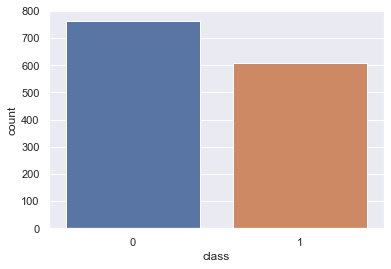

In [213]:
sns.countplot(x="class", data=data);

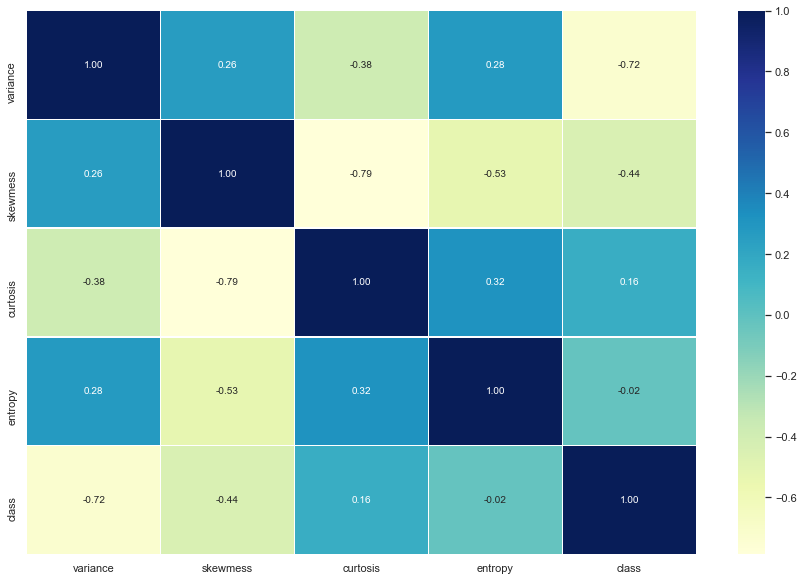

In [214]:
# Plotting corr plot 
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Since, there is no strong correlation between varibles lets continue with model building. Moreover, Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. Hence, I am building model without any scaling methods.

### Modeling

In [215]:
X = data.drop('class', axis=1)
y = data['class']

In [216]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

In [217]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [218]:
dt_model.score(X_train, y_train)

1.0

In [219]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [220]:
y_test[:]

385     0
899     1
47      0
1018    1
786     1
       ..
700     0
343     0
654     0
435     0
744     0
Name: class, Length: 275, dtype: int64

# Cross Entropy

In [221]:
# With binarization
y_pred_proba = dt_model.predict_proba(X_test)
y_pred = binarize(y_pred_proba)
log_loss(y_pred,y_test)

0.25119110105389686

In [222]:
# Without binarization
y_pred_proba = dt_model.predict_proba(X_test)
log_loss(y_pred_proba,y_test)

0.25119110105389686

Please Note : Above cross entropy function could be wrong. Please do not refer it. Thank You.

# 1. Tree Pruning

I have basic understanding of other default parameters of DT algorithm, however I had no idea about Tree Pruning, and this was my first time doing it so,  hence followed below ref : 
https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

In [223]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [224]:
print(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

1.0 0.9927272727272727


In [225]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00090533, 0.00176618, 0.00180436, 0.00180562,
       0.00181366, 0.00263344, 0.00316013, 0.00481313, 0.00972349,
       0.0097659 , 0.01463518, 0.01506545, 0.01649593, 0.04029822,
       0.08050669, 0.24209451])

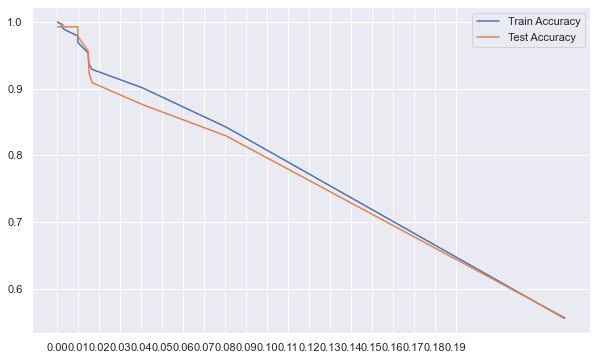

In [226]:
acc_train = [] 
acc_test  =  []

for i in alphas:
    dt_model=DecisionTreeClassifier(ccp_alpha=i)
    dt_model.fit(X_train, y_train)
    y_train_pred = dt_model.predict(X_train)
    y_test_pred = dt_model.predict(X_test)
    
    acc_train.append(accuracy_score(y_train,y_train_pred))
    acc_test.append(accuracy_score(y_test,y_test_pred))
    
sns.set()
plt.figure(figsize = (10, 6))
sns.lineplot(y=acc_train, x=alphas, label = "Train Accuracy")
sns.lineplot(y=acc_test, x=alphas, label = "Test Accuracy")
plt.xticks(ticks = np.arange(0.00, 0.20, 0.01))
plt.show()

In [227]:
dt_model=DecisionTreeClassifier(ccp_alpha=0.015, random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [230]:
print(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

1.0 0.9927272727272727


There is no significant change in accuracy even after tree pruning, hence lets do other classification metrics

In [231]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[151,   2],
       [  0, 122]], dtype=int64)

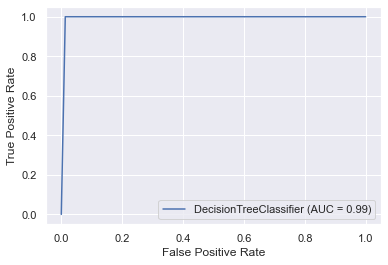

In [232]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_model,X_test,y_test);

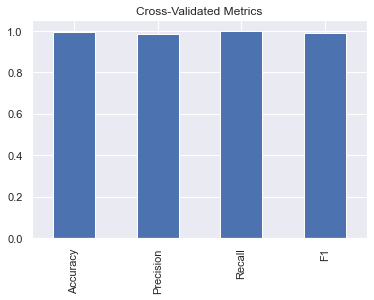

In [233]:
# Visualizing cross-validated metrics
metrics = pd.DataFrame({"Accuracy": accuracy_score(y_test, y_pred),
                            "Precision": precision_score(y_test, y_pred),
                            "Recall": recall_score(y_test, y_pred),
                            "F1": f1_score(y_test, y_pred)},
                          index=[0])
metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 2 . Categorical Dataset

In [234]:
# Changing the criterion method to Information Gain
dt_model = DecisionTreeClassifier(criterion='entropy',random_state = 42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9927272727272727, 0.991869918699187, 0.9838709677419355, 1.0)

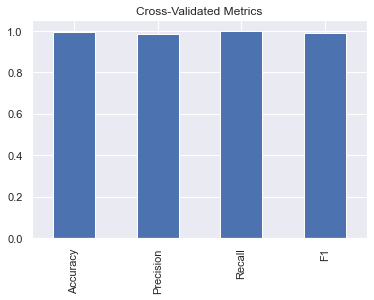

In [235]:
# Visualizing cross-validated metrics
metrics = pd.DataFrame({"Accuracy": accuracy_score(y_test, y_pred),
                            "Precision": precision_score(y_test, y_pred),
                            "Recall": recall_score(y_test, y_pred),
                            "F1": f1_score(y_test, y_pred)},
                          index=[0])
metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 3.Regression

In [236]:
# Getting the best parameters of the Decision tree by using RandomizedSearchCV
dt_grid = {
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [237]:
rs_rf = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs=-1,
                           random_state=42
                          )

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [238]:
rs_rf.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}

In [239]:
dt_model = DecisionTreeClassifier(min_samples_split=6,min_samples_leaf=1,max_depth=10, random_state = 42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9927272727272727, 0.991869918699187, 0.9838709677419355, 1.0)

It seems that accuracy of the model does not change even with the best parameters.
Please do reply with any correction or improvement with tha model. Thank you.

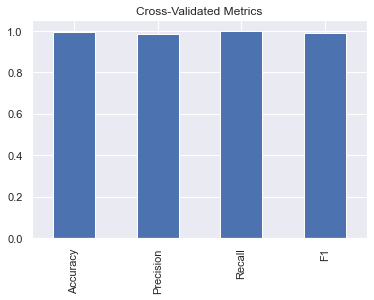

In [205]:
# Visualizing cross-validated metrics
metrics = pd.DataFrame({"Accuracy": accuracy_score(y_test, y_pred),
                            "Precision": precision_score(y_test, y_pred),
                            "Recall": recall_score(y_test, y_pred),
                            "F1": f1_score(y_test, y_pred)},
                          index=[0])
metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);